# Notebook error analysis 

## Manual labels of the sampled errors

## Chi-square test

An often quoted guideline for the validity of this calculation is that the test should be used only if the observed and expected frequencies in each cell are at least 5.

    p-value<0.05 -> reject the null hypothesis (there s no difference between the two distributions)-> the two dist are statistically different
    p-value>0.05 -> cannot reject the null, not different

[scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

[Chi-squared_test](https://en.wikipedia.org/wiki/Chi-squared_test)

[color map](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In [1]:
# import importlib
# importlib.reload(visualization_util)
# import visualization_util

In [2]:
import pandas as pd
import config
import visualization_util
from IPython.display import display

# summed config
# config
df_mlerr_label_config_sum = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_config_sum.xlsx'),
                                keep_default_na=False)
# data
df_mlerr_labels_g_sum = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_g_sum.xlsx'))
df_mlerr_labels_k_sum = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_k_sum.xlsx'))

path_default=WindowsPath('C:/Users/yirwa29/Downloads/Dataset-Nb')


In [3]:
exclude_config = ["label_if_error_chain"] # because it is the same as root cause==nb specific-previous cell error
df_mlerr_label_config_sum.drop(exclude_config, axis=1, inplace=True)

In [4]:
exclude_other = ['should exclude']
exclude_ml_pipeline_sum = [] #'not applicable','unknown'
df_mlerr_labels_g_sum_exed = df_mlerr_labels_g_sum[(~df_mlerr_labels_g_sum.label_ML_pipeline.isin(exclude_ml_pipeline_sum))&(~df_mlerr_labels_g_sum.other.isin(exclude_other))]
df_mlerr_labels_k_sum_exed = df_mlerr_labels_k_sum[(~df_mlerr_labels_k_sum.label_ML_pipeline.isin(exclude_ml_pipeline_sum))&(~df_mlerr_labels_k_sum.other.isin(exclude_other))]

In [5]:
# before/after filtering
print(df_mlerr_labels_g_sum.eid.nunique(), df_mlerr_labels_g_sum_exed.eid.nunique())
print(df_mlerr_labels_k_sum.eid.nunique(), df_mlerr_labels_k_sum_exed.eid.nunique())

390 389
356 353


In [6]:
# Summarize the statistics - df_mlerr_labels_sum_excluded
# github stats
cluster_res_g_sum_exed = visualization_util.statistics_labels(df_mlerr_label_config_sum, df_mlerr_labels_g_sum_exed)
for label_key in df_mlerr_label_config_sum:
    cluster_res_g_sum_exed[label_key] = pd.DataFrame.from_dict(cluster_res_g_sum_exed[label_key]).rename_axis('cluster_id').reset_index()
# for all clusters    
cluster_res_g_sum_exed_weighted_sum = visualization_util.cal_weighted_sum(df_mlerr_label_config_sum, cluster_res_g_sum_exed)

# kaggle stats
cluster_res_k_sum_exed = visualization_util.statistics_labels(df_mlerr_label_config_sum, df_mlerr_labels_k_sum_exed)
for label_key in df_mlerr_label_config_sum:
    cluster_res_k_sum_exed[label_key] = pd.DataFrame.from_dict(cluster_res_k_sum_exed[label_key]).rename_axis('cluster_id').reset_index()
cluster_res_k_sum_exed_weighted_sum = visualization_util.cal_weighted_sum(df_mlerr_label_config_sum, cluster_res_k_sum_exed)

In [7]:
for label_key in df_mlerr_label_config_sum:
    visualization_util.chisquare_test(cluster_res_g_sum_exed_weighted_sum[label_key], cluster_res_k_sum_exed_weighted_sum[label_key], label_key)


label_root_cause
Removed number of features due to few(<5) data points: 1 1
Chi2ContingencyResult: pvalue is  0.8551605975105636 (Not statistically different)

label_ML_pipeline
Removed number of features due to few(<5) data points: 0 0
Chi2ContingencyResult: pvalue is  0.291780370899666 (Not statistically different)

label_if_ML_bug
Removed number of features due to few(<5) data points: 1 1
Chi2ContingencyResult: pvalue is  0.0006922742319700213 (Statistically different)

label_refined_exp_type
Removed number of features due to few(<5) data points: 4 4
Chi2ContingencyResult: pvalue is  0.997184245482874 (Not statistically different)

label_if_runinfo_help
Removed number of features due to few(<5) data points: 0 0
Chi2ContingencyResult: pvalue is  0.04513362197083384 (Statistically different)

label_if_code_error_align
Removed number of features due to few(<5) data points: 1 1
Chi2ContingencyResult: pvalue is  0.8210045399492283 (Not statistically different)

other
Removed number of f

In [8]:
# exception types
# top 10 + other (remainings)

cluster_res_exp_type_sum_weighted_sum = {x: cluster_res_k_sum_exed_weighted_sum['label_refined_exp_type'].get(x, 0) + cluster_res_g_sum_exed_weighted_sum['label_refined_exp_type'].get(x, 0)
                                         for x in set(cluster_res_k_sum_exed_weighted_sum['label_refined_exp_type']).union(cluster_res_g_sum_exed_weighted_sum['label_refined_exp_type'])}
df_cluster_res_exp_type_sum = pd.DataFrame(cluster_res_exp_type_sum_weighted_sum, index=["Combined"]).T.sort_values(by="Combined", ascending=False)
include_num = 10
df_cluster_res_exp_type_other = pd.DataFrame(df_cluster_res_exp_type_sum[include_num:].sum(axis=0)).T.rename(index={0: "other"})
df_cluster_res_exp_type_sum = pd.concat([df_cluster_res_exp_type_sum[:include_num], df_cluster_res_exp_type_other])

df_cluster_res_exp_type_kg = pd.DataFrame([cluster_res_k_sum_exed_weighted_sum['label_refined_exp_type'],
                   cluster_res_g_sum_exed_weighted_sum['label_refined_exp_type']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
# df_cluster_res_exp_type_kg
df_cluster_res_exp_type_kg_other = pd.DataFrame(df_cluster_res_exp_type_kg[~df_cluster_res_exp_type_kg.index.isin(df_cluster_res_exp_type_sum.index[:include_num])].sum(axis=0)).T.rename(index={0: "other"})
df_cluster_res_exp_type_kg = pd.concat([df_cluster_res_exp_type_kg.loc[df_cluster_res_exp_type_sum.index[:include_num].to_list()], df_cluster_res_exp_type_kg_other])
df_cluster_res_exp_type_kg = pd.concat([df_cluster_res_exp_type_sum, df_cluster_res_exp_type_kg], axis=1)
# df_cluster_res_exp_type_kg.loc['total']= df_cluster_res_exp_type_kg.sum()

df_cluster_res_exp_type_kg.index.name = "Exception type"
display(df_cluster_res_exp_type_kg[["Combined","GitHub","Kaggle"]])

,Combined,GitHub,Kaggle
Exception type,,,
name,219,121,98
value,88,44,44
type,81,38,43
io,70,32,38
API arg,68,40,28
key,51,22,29
attribute,51,29,22
index,26,14,12
resource,18,7,11


In [9]:
# percentages
(df_cluster_res_exp_type_kg/df_cluster_res_exp_type_kg.sum()*100).round(2)[["Combined","GitHub","Kaggle"]]

,Combined,GitHub,Kaggle
Exception type,,,
name,29.51,31.11,27.76
value,11.86,11.31,12.46
type,10.92,9.77,12.18
io,9.43,8.23,10.76
API arg,9.16,10.28,7.93
key,6.87,5.66,8.22
attribute,6.87,7.46,6.23
index,3.50,3.60,3.40
resource,2.43,1.80,3.12


In [10]:
# calculate correlation between rc and exp
df_grouped_g = df_mlerr_labels_g_sum_exed.groupby("label_refined_exp_type")["label_root_cause"].value_counts().unstack("label_root_cause")
df_other_g = pd.DataFrame(df_grouped_g[~df_grouped_g.index.isin(df_cluster_res_exp_type_kg.index[:include_num])].sum(axis=0)).T.rename(index={0: "other"})
df_grouped_g = pd.concat([df_grouped_g.loc[df_cluster_res_exp_type_kg.index[:include_num].to_list()], df_other_g])
df_grouped_g.insert(6, "library", 0)
df_grouped_g = df_grouped_g.fillna(0)
display(df_grouped_g)

df_grouped_k = df_mlerr_labels_k_sum_exed.groupby("label_refined_exp_type")["label_root_cause"].value_counts().unstack("label_root_cause")
df_other_k = pd.DataFrame(df_grouped_k[~df_grouped_k.index.isin(df_cluster_res_exp_type_kg.index[:include_num])].sum(axis=0)).T.rename(index={0: "other"})
df_grouped_k = pd.concat([df_grouped_k.loc[df_cluster_res_exp_type_kg.index[:include_num].to_list()], df_other_k])
df_grouped_k = df_grouped_k.fillna(0)
display(df_grouped_k)

label_root_cause,API,NB specific,data,environment,implementation,intentional,library,resources,unknown
name,1.0,68.0,0.0,21.0,29.0,0.0,0,0.0,2.0
value,11.0,2.0,20.0,0.0,3.0,4.0,0,0.0,4.0
type,9.0,1.0,10.0,0.0,8.0,8.0,0,0.0,2.0
io,2.0,1.0,0.0,26.0,2.0,1.0,0,0.0,0.0
API arg,26.0,0.0,6.0,1.0,3.0,1.0,0,0.0,3.0
key,4.0,2.0,15.0,0.0,0.0,0.0,0,0.0,1.0
attribute,11.0,2.0,4.0,3.0,6.0,0.0,0,0.0,3.0
index,3.0,0.0,8.0,0.0,1.0,1.0,0,0.0,1.0
resource,0.0,0.0,0.0,0.0,0.0,0.0,0,7.0,0.0
environment,1.0,0.0,0.0,8.0,1.0,0.0,0,0.0,0.0


label_root_cause,API,NB specific,data,environment,implementation,intentional,library,resources,unknown
name,0.0,54.0,0.0,10.0,31.0,1.0,0.0,0.0,2.0
value,14.0,0.0,18.0,0.0,8.0,2.0,1.0,0.0,1.0
type,17.0,0.0,18.0,0.0,5.0,2.0,0.0,0.0,1.0
io,4.0,0.0,0.0,33.0,1.0,0.0,0.0,0.0,0.0
API arg,17.0,0.0,6.0,0.0,1.0,0.0,2.0,0.0,2.0
key,6.0,8.0,13.0,0.0,1.0,1.0,0.0,0.0,0.0
attribute,10.0,1.0,4.0,1.0,4.0,0.0,1.0,0.0,1.0
index,4.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0
resource,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0
environment,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# # chisquare_test of each root cause-exp distribution between github and kaggle
# for id_exp in range(df_grouped_g.shape[0]):
#     visualization_util.chisquare_test(df_grouped_g.iloc[id_exp], df_grouped_k.iloc[id_exp], df_grouped_k.index[id_exp], min_dp=5)

Too few samples for chi-square test to work properly.

We try Barnard's exact test on "each root cause + the rest of the root causes" between GitHub and Kaggle, then do Bonferroni Correction.

Barnard's exact test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.barnard_exact.html

Bonferroni Correction
    
    How it works: This is a simple and conservative method to adjust for multiple comparisons. The idea is to divide the significance level by the number of tests (m) to control the family-wise error rate (FWER).
    Procedure:
    If you conduct x tests (e.g., one test for each category vs. the rest), adjust the significance threshold by using 𝛼/x.
        Which means p-value needs to be p<0.05/x (for CI=95%)
    Advantages: Controls the probability of making even a single Type I error (false positive).
    Disadvantages: Very conservative, which can increase the chance of missing true effects (i.e., high Type II error).

In [12]:
# barnard's exact test + Bonferroni Correction
from scipy.stats import chi2_contingency, barnard_exact

for id_exp in range(df_grouped_g.shape[0]):
    label_exp = df_grouped_g.index[id_exp]
    print("testing ---",label_exp)
    correction = df_grouped_g.shape[1]
    is_different = False
    for id_rc in range(df_grouped_g.shape[1]):
        label_rc = df_grouped_g.columns[id_rc]
        print("    --",label_rc, "against the rest")
        count_rc_g = df_grouped_g.iloc[id_exp][label_rc]
        count_rc_k = df_grouped_k.iloc[id_exp][label_rc]
        table_label_key_gk = [[count_rc_g,count_rc_k], # number of rc
                              [df_grouped_g.iloc[id_exp].sum()-count_rc_g, # number of the rest of rcs
                               df_grouped_k.iloc[id_exp].sum()-count_rc_k]]
        pvalue_be = barnard_exact(table_label_key_gk).pvalue
        print("        p-value is", pvalue_be, "corrected p-value is", pvalue_be*correction)
        if pvalue_be*correction < 0.05:
            print("Found enough evidence to reject the null hypothesis: they are statistically different")
            is_different = True
            continue
    if not is_different:
        print("-->Not statistically different\n")

testing --- name
    -- API against the rest
        p-value is 0.39824263300909646 corrected p-value is 3.584183697081868
    -- NB specific against the rest
        p-value is 0.9113355559684723 corrected p-value is 8.20202000371625
    -- data against the rest
        p-value is 1.0 corrected p-value is 9.0
    -- environment against the rest
        p-value is 0.1565312741279721 corrected p-value is 1.408781467151749
    -- implementation against the rest
        p-value is 0.2135587017219257 corrected p-value is 1.9220283154973314
    -- intentional against the rest
        p-value is 0.3553138043505608 corrected p-value is 3.1978242391550475
    -- library against the rest
        p-value is 1.0 corrected p-value is 9.0
    -- resources against the rest
        p-value is 1.0 corrected p-value is 9.0
    -- unknown against the rest
        p-value is 0.9113294156526733 corrected p-value is 8.20196474087406
-->Not statistically different

testing --- value
    -- API against the r

        p-value is 0.24339294433593772 corrected p-value is 2.1905364990234393
    -- implementation against the rest
        p-value is 0.5615686958320896 corrected p-value is 5.054118262488807
    -- intentional against the rest
        p-value is 1.0 corrected p-value is 9.0
    -- library against the rest
        p-value is 1.0 corrected p-value is 9.0
    -- resources against the rest
        p-value is 1.0 corrected p-value is 9.0
    -- unknown against the rest
        p-value is 1.0 corrected p-value is 9.0
-->Not statistically different

testing --- other
    -- API against the rest
        p-value is 0.910001869098249 corrected p-value is 8.19001682188424
    -- NB specific against the rest
        p-value is 0.8092147944903909 corrected p-value is 7.282933150413518
    -- data against the rest
        p-value is 0.910001869098249 corrected p-value is 8.19001682188424
    -- environment against the rest
        p-value is 0.6396253449726613 corrected p-value is 5.756628104753

In [13]:
mlbug = pd.DataFrame([cluster_res_k_sum_exed_weighted_sum['label_if_ML_bug'],
                   cluster_res_g_sum_exed_weighted_sum['label_if_ML_bug']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
mlbug['Kaggle']=(mlbug['Kaggle']/mlbug['Kaggle'].sum()*100).round(2)
mlbug['GitHub']=(mlbug['GitHub']/mlbug['GitHub'].sum()*100).round(2)

mlbug.index=["ML bug", "Python bug", "Unknown"]
mlbug.index.name = 'If ML bug'
mlbug[["GitHub","Kaggle"]].iloc[:2]

,GitHub,Kaggle
If ML bug,,
ML bug,58.61,70.82
Python bug,41.39,29.18


In [14]:
df_grouped_g = df_mlerr_labels_g_sum_exed.groupby("label_if_ML_bug")["label_root_cause"].value_counts().unstack("label_root_cause")
df_grouped_g.insert(6, "library", 0)
df_grouped_k = df_mlerr_labels_k_sum_exed.groupby("label_if_ML_bug")["label_root_cause"].value_counts().unstack("label_root_cause")
df_grouped_k = df_grouped_k.fillna(0).astype(int)
display(df_grouped_g)
display(df_grouped_k)

label_root_cause,API,NB specific,data,environment,implementation,intentional,library,resources,unknown
label_if_ML_bug,,,,,,,,,
ML bug,47,50,50,32,23,8,0,6,12
python bug,23,27,15,35,36,11,0,2,12


label_root_cause,API,NB specific,data,environment,implementation,intentional,library,resources,unknown
label_if_ML_bug,,,,,,,,,
ML bug,62,48,58,27,27,7,2,11,8
python bug,11,17,8,28,27,2,3,0,7


In [15]:
# chisquare_test of each root cause-ml bug distribution between github and kaggle
for id_mlbug in range(df_grouped_g.shape[0]):
    visualization_util.chisquare_test(df_grouped_g.iloc[id_mlbug], df_grouped_k.iloc[id_mlbug], df_grouped_k.index[id_mlbug], min_dp=5)


ML bug
Removed number of features due to few(<5) data points: 1 1
Chi2ContingencyResult: pvalue is  0.666429881857791 (Not statistically different)

python bug
Removed number of features due to few(<5) data points: 3 3
Chi2ContingencyResult: pvalue is  0.8580535191133218 (Not statistically different)


In [16]:
# chisquare_test of each root cause-ml bug distribution between ml bug and python bug
source_list = ["GitHub", "Kaggle", "Combined"]
df_grouped = df_grouped_g + df_grouped_k

visualization_util.chisquare_test(df_grouped_g.iloc[0], df_grouped_g.iloc[1], source_list[0], min_dp=5)
visualization_util.chisquare_test(df_grouped_k.iloc[0], df_grouped_k.iloc[1], source_list[1], min_dp=5)
visualization_util.chisquare_test(df_grouped.iloc[0], df_grouped.iloc[1], source_list[2], min_dp=5)


GitHub
Removed number of features due to few(<5) data points: 2 2
Chi2ContingencyResult: pvalue is  0.00010430983033244071 (Statistically different)

Kaggle
Removed number of features due to few(<5) data points: 3 3
Chi2ContingencyResult: pvalue is  5.7014513489488057e-08 (Statistically different)

Combined
Removed number of features due to few(<5) data points: 2 2
Chi2ContingencyResult: pvalue is  2.3973720882076537e-12 (Statistically different)


2.3973720882076537e-12

In [17]:
df_grouped_g = df_mlerr_labels_g_sum_exed.groupby("label_ML_pipeline")["label_if_ML_bug"].value_counts().unstack("label_if_ML_bug")
df_grouped_k = df_mlerr_labels_k_sum_exed.groupby("label_ML_pipeline")["label_if_ML_bug"].value_counts().unstack("label_if_ML_bug")[["ML bug","python bug"]]
display(df_grouped_g)
display(df_grouped_k)

label_if_ML_bug,ML bug,python bug
label_ML_pipeline,,
data preparation,56,55
data visualization,24,16
environment setup,14,17
evaluation/prediction,29,12
model construction,17,3
no ML pipeline,45,51
training,43,7


label_if_ML_bug,ML bug,python bug
label_ML_pipeline,,
data preparation,64,28
data visualization,29,14
environment setup,3,16
evaluation/prediction,54,19
model construction,27,5
no ML pipeline,14,12
training,59,9


In [18]:
# Barnard exact test of ml bug distributions between github and kaggle for each pipeline
# because sample size of some is less than 5: environment setup(ML bug-Kaggle),model construction(python bug-GitHub)
for id_exp in range(df_grouped_g.shape[0]):
    visualization_util.barnard_test(df_grouped_g.iloc[id_exp], df_grouped_k.iloc[id_exp], df_grouped_k.index[id_exp])


data preparation
Barnard exact result: pvalue is  0.0059478253328084825 (Statistically different)

data visualization
Barnard exact result: pvalue is  0.5310367247143607 (Not statistically different)

environment setup
Barnard exact result: pvalue is  0.03872079660075307 (Statistically different)

evaluation/prediction
Barnard exact result: pvalue is  0.7956564469306584 (Not statistically different)

model construction
Barnard exact result: pvalue is  0.9975062319594692 (Not statistically different)

no ML pipeline
Barnard exact result: pvalue is  0.5973778512702463 (Not statistically different)

training
Barnard exact result: pvalue is  0.9238610345242568 (Not statistically different)


In [19]:
# Barnard exact test of None pipeline vs. the rest between github and kaggle

from scipy.stats import chi2_contingency

mlpp_g = cluster_res_g_sum_exed_weighted_sum["label_ML_pipeline"].copy()
mlpp_k = cluster_res_k_sum_exed_weighted_sum["label_ML_pipeline"].copy()

test_nopipeline = [[mlpp_g["no ML pipeline"],mlpp_k["no ML pipeline"]], 
                   [sum(mlpp_g.values())-mlpp_g["no ML pipeline"], sum(mlpp_k.values())-mlpp_k["no ML pipeline"]]]

test_nopipeline = [[mlpp_g["no ML pipeline"],sum(mlpp_g.values())-mlpp_g["no ML pipeline"]], 
                   [mlpp_k["no ML pipeline"], sum(mlpp_k.values())-mlpp_k["no ML pipeline"]]]

pvalue_chisquare = chi2_contingency(test_nopipeline).pvalue
print("Chi2ContingencyResult: pvalue is ", pvalue_chisquare, 
      "(Not statistically different)" if pvalue_chisquare > 0.05 else "(Statistically different)")

Chi2ContingencyResult: pvalue is  3.97213081581176e-10 (Statistically different)


In [20]:
visualization_util.chisquare_test(mlpp_g, mlpp_k, "ML pipeline including None pipeline stage")


ML pipeline including None pipeline stage
Removed number of features due to few(<5) data points: 0 0
Chi2ContingencyResult: pvalue is  0.291780370899666 (Not statistically different)


0.291780370899666

In [21]:
mlpp_g.pop('no ML pipeline', None)
mlpp_k.pop('no ML pipeline', None)

26

In [22]:
# post hoc analysis after a chi-square test
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, norm

observed_df = pd.concat([pd.DataFrame.from_dict(mlpp_g, columns=["GitHub"],orient='index').T, pd.DataFrame.from_dict(mlpp_k, columns=["Kaggle"],orient='index').T])
chi_res = visualization_util.chisquare_test(observed_df.iloc[0], observed_df.iloc[1], "ML pipeline excluding None pipeline stage", res_all=True)
expected = chi_res.expected_freq
expected_df = pd.DataFrame(expected, columns=["GitHub","Kaggle"], index=observed_df.columns).T

residuals_std = ((observed_df.T.to_numpy()-expected)/np.sqrt(expected))
residuals_std_df = pd.DataFrame(residuals_std, columns=["GitHub","Kaggle"], index=observed_df.columns).T


ML pipeline excluding None pipeline stage
Removed number of features due to few(<5) data points: 0 0
Chi2ContingencyResult: pvalue is  0.003717465575823081 (Statistically different)


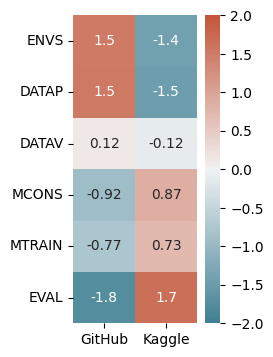

In [27]:
# test which variables contribute more to the difference

import seaborn as sns
import matplotlib.pyplot as plt

order_mlpp = ["environment setup", "data preparation", "data visualization", "model construction", "training", 
              "evaluation/prediction"]
mlpp2abbr = {'environment setup':"ENVS", 'data preparation':"DATAP", 'data visualization':"DATAV",
             'model construction':"MCONS", 'training':"MTRAIN", 'evaluation/prediction':"EVAL", 'no ML pipeline':"NONE"}
residuals_std_df = residuals_std_df[order_mlpp]
plt.figure(figsize=(2,4))
cm_dp = sns.diverging_palette(220, 20, center="light", as_cmap=True)
rc_new = [mlpp2abbr[x] for x in residuals_std_df.columns]
s = sns.heatmap(residuals_std_df[order_mlpp].T, annot=True, yticklabels=rc_new, cmap=cm_dp, 
                center=0,vmin=-2, vmax=2)
s.set(xlabel='', ylabel='')
s.figure.savefig(r"C:\Users\yirwa29\OneDrive - Linköpings universitet\SAProject\Paper2/mlpp_residuals.pdf", bbox_inches='tight')
plt.show()